Esto es una prueba con sensores que cargan datos de fichero xlsx o csv de /data.
Incluye:
- los mensajes genéricos de tipo EVENT con timestamp y payload
- Tan solo se generan mensajes cuando hay una telemetría.
- La simulación se realiza acorde al tiempo de la telemetría, permitiendo fijar inicio y fin.


In [8]:
#Si no se trabaja en el directorio padre se debe bajar a él.
#Jupiter notebook works on actual dir, change to father dir.
#from os import chdir, getcwd
#path=getcwd()
#if path[-1]=='e': chdir('..')
#path=getcwd()
#print(path)


In [9]:
#Test1 es un ByPass de Fichero a Fichero
from xdevs.sim import Coordinator
from edge.newfile import Test1
import datetime as dt

startdt=dt.datetime(2021,8,1,0,0,0)
enddt=dt.datetime(2021,8,2,0,0,0)
%startdt=dt.datetime(2021,8,1,0,0,0)
%enddt=dt.datetime(2021,8,10,23,0,0)
simseconds=(enddt-startdt).total_seconds()
coupled = Test1("ExampleTest1", start=startdt, log=False)
coord = Coordinator(coupled, flatten=True)
coord.initialize()
coord.simulate_time(simseconds)
coord.exit()

UsageError: Line magic function `%startdt=dt.datetime(2021,8,1,0,0,0)` not found.


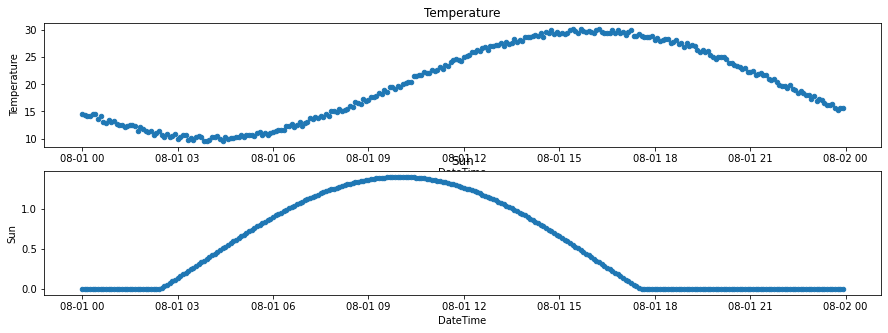

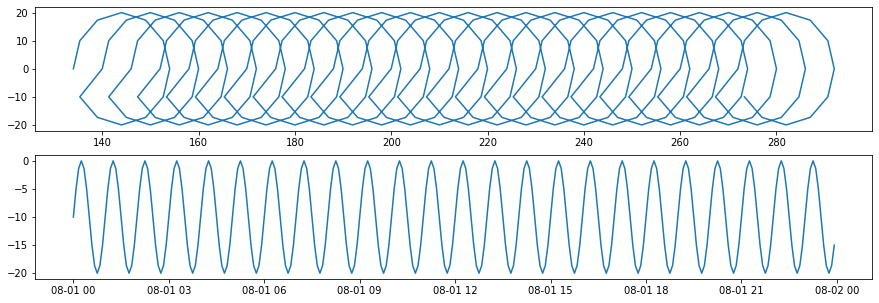

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,5)
plt.close("all")
fig, axes=plt.subplots(nrows=2,ncols=1)

T1=pd.read_excel('./data/FileOutT1.xlsx')  #Lectura de resultados excel
T1.plot(ax=axes[0],x='DateTime',y='Temperature',title='Temperature',kind='scatter')
S1=pd.read_excel('./data/FileOutS1.xlsx')  #Lectura de resultados excel
S1.plot(ax=axes[1],x='DateTime',y='Sun',title='Sun',kind='scatter')


P1=pd.read_excel('./data/FileOutP1.xlsx')
#fig,P1.plot(x='DateTime',y={'PosX','PosY','PosZ'},title='3D Position')
fig1=plt.figure()
axy ,adz = fig1.subplots(2,1)
axy.plot(P1.PosX,P1.PosY)
adz.plot(P1.DateTime,P1.PosZ)


In [11]:
# Test2 es una fusión de Telemtrías de dos ficehros, 
# uno de Posiciones 3D y otro de detección de Bloom

from xdevs.sim import Coordinator
from edge.newfile import Test2
import datetime as dt

startdt=dt.datetime(2021,8,1,0,0,0)
enddt=dt.datetime(2021,8,2,0,0,0)
#enddt=dt.datetime(2021,8,3,0,0,0)
simseconds=(enddt-startdt).total_seconds()
coupled = Test2("ExampleBloomDetection", start=startdt, log=True)
coord = Coordinator(coupled, flatten=True)
print('Ini Simulación')
coord.initialize()
coord.simulate_time(simseconds)   #En segundos
coord.exit()
print('Fin Simulación')

Ini Simulación
FileIn: FilPos1 DateTime: 2021-08-01T00:00:00.000000000 Payload: {'PosX': 134.00000000000003, 'PosY': 0.0, 'PosZ': -10.0}
FileIn: DetBlo DateTime: 2021-08-01T00:00:00.000000000 Payload: {'DetB': 0.0, 'DetBb': 0}
FileOut: filePB DateTime: 2021-08-01T00:00:00.000000000 PayLoad: {'PosX': 134.00000000000003, 'PosY': 0.0, 'PosZ': -10.0, 'DetB': 0.0, 'DetBb': 0}
FileIn: FilPos1 DateTime: 2021-08-01T00:05:00.000000000 Payload: {'PosX': 135.33974596215563, 'PosY': 9.999999999999998, 'PosZ': -5.000000000000001}
FileIn: DetBlo DateTime: 2021-08-01T00:05:00.000000000 Payload: {'DetB': 0.0, 'DetBb': 0}
FileOut: filePB DateTime: 2021-08-01T00:05:00.000000000 PayLoad: {'PosX': 135.33974596215563, 'PosY': 9.999999999999998, 'PosZ': -5.000000000000001, 'DetB': 0.0, 'DetBb': 0}
FileIn: FilPos1 DateTime: 2021-08-01T00:10:00.000000000 Payload: {'PosX': 139.00000000000003, 'PosY': 17.32050807568877, 'PosZ': -1.3397459621556145}
FileIn: DetBlo DateTime: 2021-08-01T00:10:00.000000000 Payload:

PermissionError: [Errno 13] Permission denied: './data/FileOutPOSBLOOM.xlsx'

<AxesSubplot:title={'center':'XZ'}, xlabel='PosX', ylabel='DetB'>

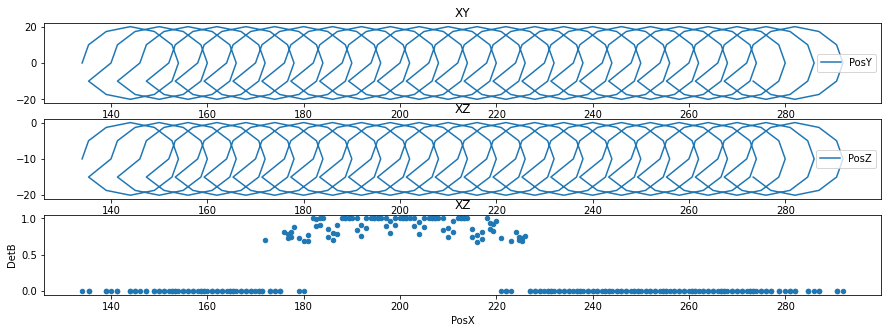

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,5)
plt.close("all")
fig, axes=plt.subplots(nrows=3,ncols=1)

PB=pd.read_excel('./data/FileOutPOSBLOOM.xlsx')  #Lectura de resultados excel
PB.plot(ax=axes[0],x='PosX',y='PosY',title='PlantaXY')
PB.plot(ax=axes[1],x='PosX',y='PosZ',title='AlzadoXZ')
PB.plot(ax=axes[2],x='PosX',y='DetB',title='Bloom Detection',kind='scatter')
